In [11]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows', 500)

# Data Preparation

- focus is always to understand the final data structure
- support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [12]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [13]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180520,180584,180615,180615,180688,180741,180784,180864,180864,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276221,276310,276342,276401,276415,276468,276518,276583,276638,276690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265889,265889,265889,265897,265900,265904,265909,265920,265925,265925
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,43067,43067,43067,43067,43067,43224,43224,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [14]:
time_idx = pd_raw.columns[4:]

In [15]:
df_plot = pd.DataFrame({
    'date':time_idx
})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [16]:
pd_raw[pd_raw['Country/Region'] == 'GERMANY'].iloc[:, 4:].sum(axis=0)

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
6/7/22     0
6/8/22     0
6/9/22     0
6/10/22    0
6/11/22    0
Length: 872, dtype: int64

In [17]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'Korea, South'
               ]

In [18]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:, 4:].sum(axis=0))

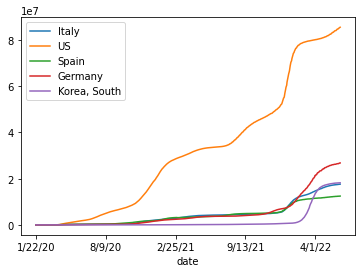

In [19]:
df_plot.set_index('date').plot()

# Data Type Date

In [20]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [21]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [22]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [24]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';', index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation

A primary key's main features are:
- It must contain a unique value for each row of data.
- It cannot contain null values

In [68]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180520,180584,180615,180615,180688,180741,180784,180864,180864,180864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276221,276310,276342,276401,276415,276468,276518,276583,276638,276690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265889,265889,265889,265897,265900,265904,265909,265920,265925,265925
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,43067,43067,43067,43067,43067,43224,43224,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [69]:
pd_data_base = pd_raw.rename(columns={'Country/Region': 'country',
                                     'Province/State': 'state'})

In [70]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180520,180584,180615,180615,180688,180741,180784,180864,180864,180864
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276221,276310,276342,276401,276415,276468,276518,276583,276638,276690
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265889,265889,265889,265897,265900,265904,265909,265920,265925,265925
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,43067,43067,43067,43067,43067,43224,43224,43224,43224
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [73]:
test_pd = pd_data_base.set_index(['state', 'country']).T

In [74]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [77]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
420299,6/11/22,Zhejiang,West Bank and Gaza,657879.0
420300,6/11/22,Zhejiang,Winter Olympics 2022,535.0
420301,6/11/22,Zhejiang,Yemen,11822.0
420302,6/11/22,Zhejiang,Zambia,323058.0


In [79]:
pd_relational_model = pd_data_base.set_index(['state', 'country']) \
                                  .T   \
                                  .stack(level=[0,1])    \
                                  .reset_index()   \
                                  .rename(columns={'level_0':'date',
                                                  0: 'confirmed'},
                                         )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [80]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [81]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [82]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object